### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [2]:
data = pd.read_csv("D:\Lu_Git_Demo\Pythoncodespace\KNN Algorithm\diabetes.csv", encoding_errors="ignore")

In [3]:
# Quality checking of data.
def quality_check(data):
  print("")
  print("*"*50)
  print("")
  print("The information of data:\n", data.info())
  print("")
  print("*"*50)
  print("")
  print("The data description is:\n", data.describe())
  print("")
  print("*"*50)
  print("")
  print("The columns of data:\n", data.columns)
  print("")
  print("*"*50)
  print("")
  print("The null count:\n", data.isnull().sum())


In [4]:
print(quality_check(data))


**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
The information of data:
 None

**************************************************

The data description is:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
c

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending=False).head(10).index

In [8]:
values = data["Pregnancies"].astype(object).value_counts().sort_values(ascending=False).head(10).values

In [9]:
def plot_categorical_data(index,values):
  plt.figure(figsize=[20,8])
  plt.subplot(1,2,1)
  plt.pie(x=values, labels=index,autopct='%1.0f%%')
  plt.subplot(1,2,2)
  sns.barplot(y=index, x=values, orient='h')
  plt.grid();
  plt.show();

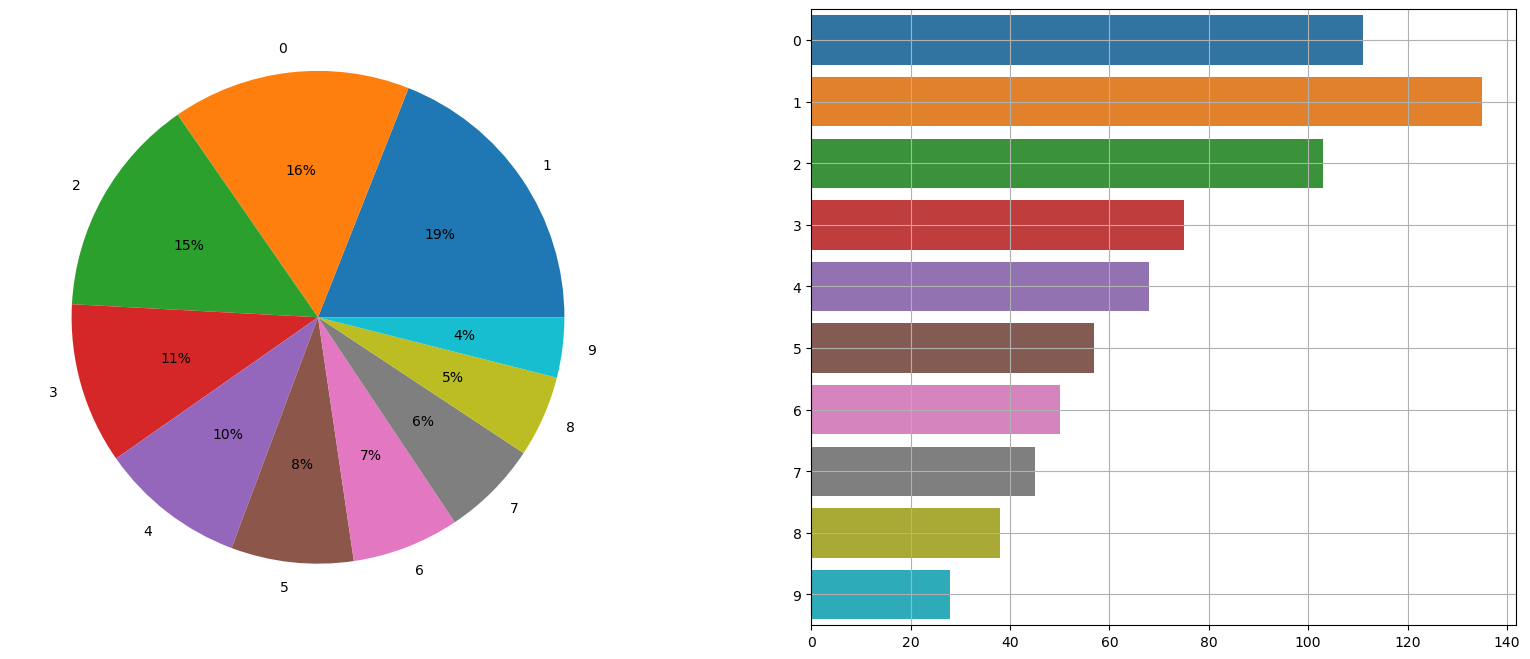

In [10]:
plot_categorical_data(index,values)

In [11]:
def plot_continuous_data(data,col):
  plt.figure(figsize=[20,8])
  plt.subplot(1,2,1)
  sns.histplot(data,x=col)
  plt.subplot(1,2,2)
  sns.boxplot(y=col, data=data)
  plt.grid();
  plt.show();

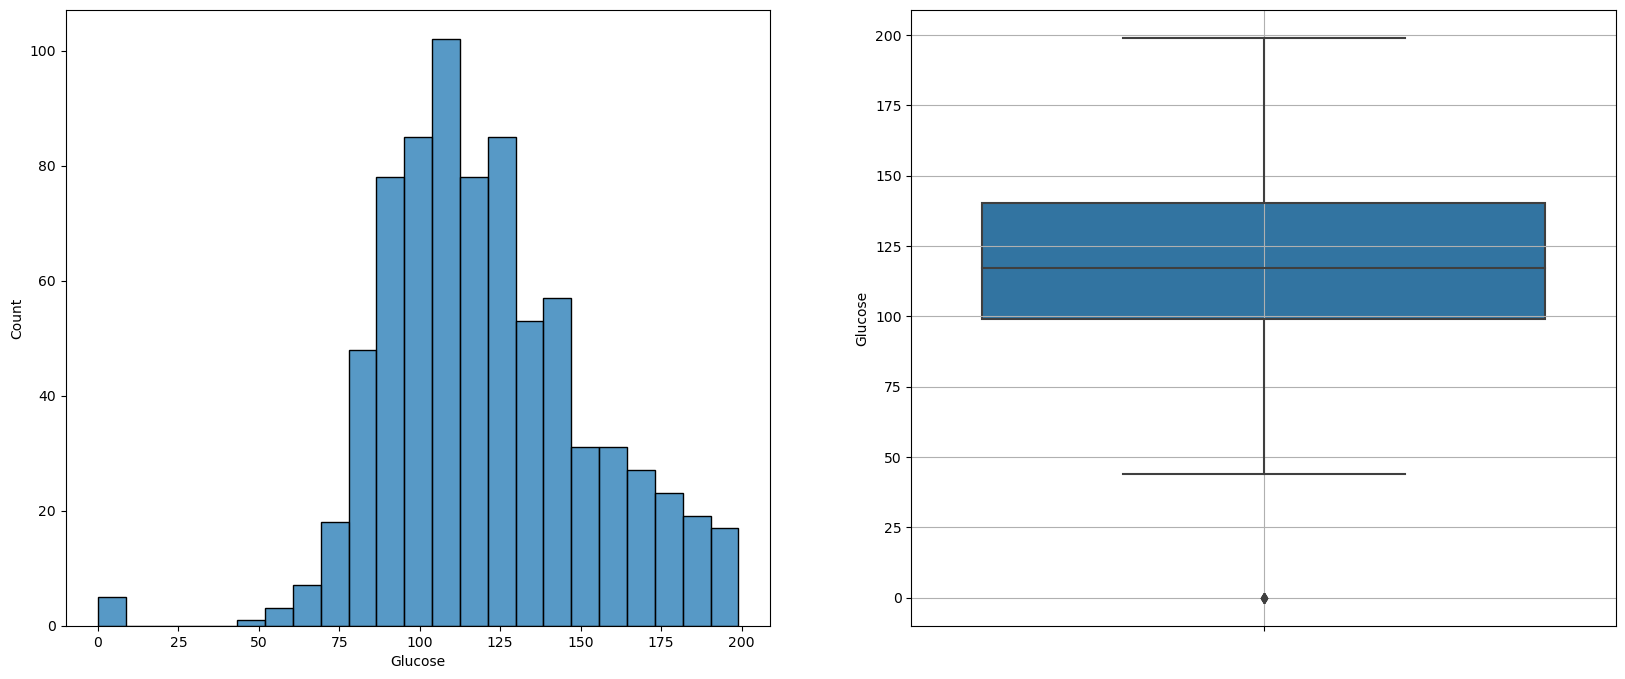

In [12]:
plot_continuous_data(data,"Glucose")

In [13]:
def separate_categorical_continuous(data):
  categorical_features, continuous_features = [], []
  for col in data.columns:
    if data[col].dtypes == 'object':
      categorical_features.append(col)
    else:
      continuous_features.append(col)
  return categorical_features, continuous_features

In [14]:
def plot_categorical_data(index,values):
  plt.figure(figsize=[20,8])
  plt.subplot(1,2,1)
  plt.pie(x=values, labels=index,autopct='%1.0f%%')
  plt.subplot(1,2,2)
  sns.barplot(y=index, x=values, orient='h')
  plt.grid();
  plt.show();

In [15]:
def plot_continuous_data(data,col):
  plt.figure(figsize=[20,8])
  plt.subplot(1,2,1)
  sns.histplot(data,x=col)
  plt.subplot(1,2,2)
  sns.boxplot(y=col, data=data)
  plt.grid();
  plt.show();

In [16]:
def univariate_data_analysis(data):
  categorical_features, continuous_features = separate_categorical_continuous(data)
  print("Categorical plots done")
  index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index
  values = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).values
  print(plot_categorical_data(index=index, values=values))

  for col in continuous_features:
    print(plot_continuous_data(data,col))


Exploratory Data Analysis Report: 
Categorical plots done


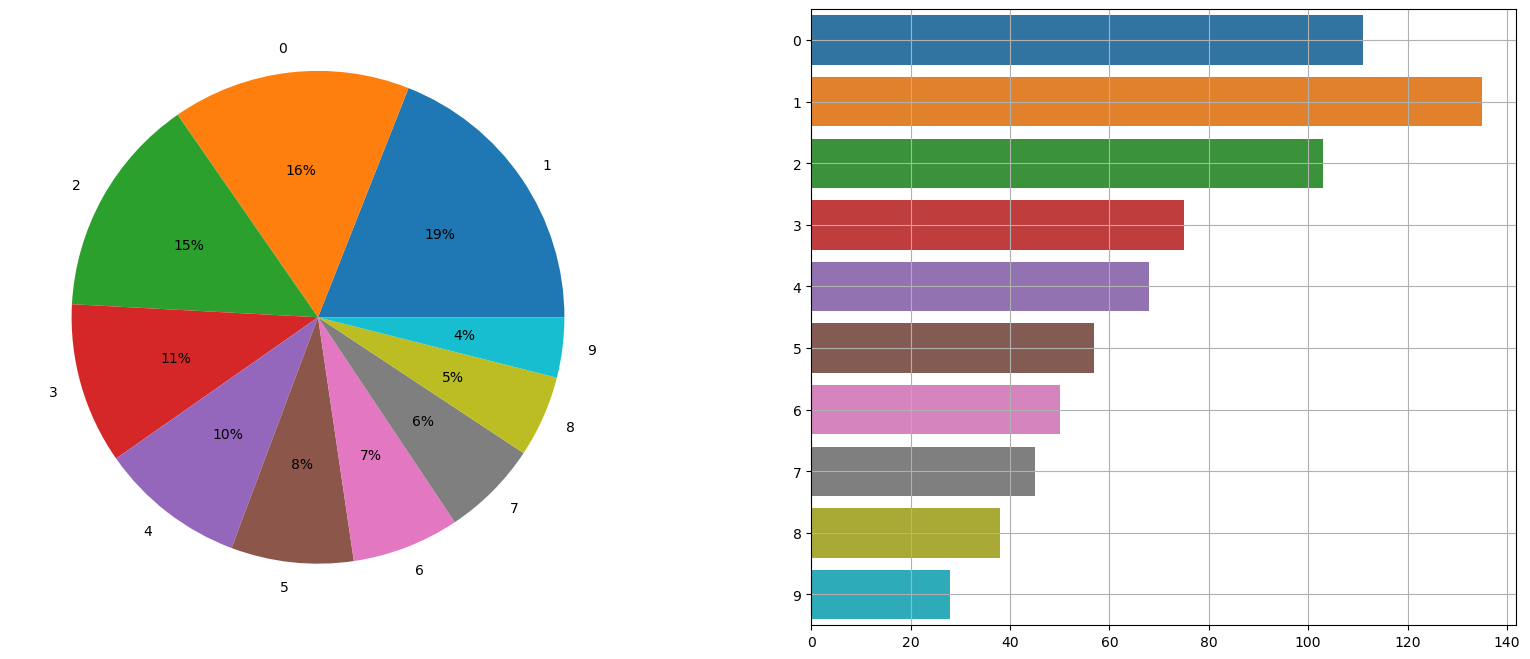

None


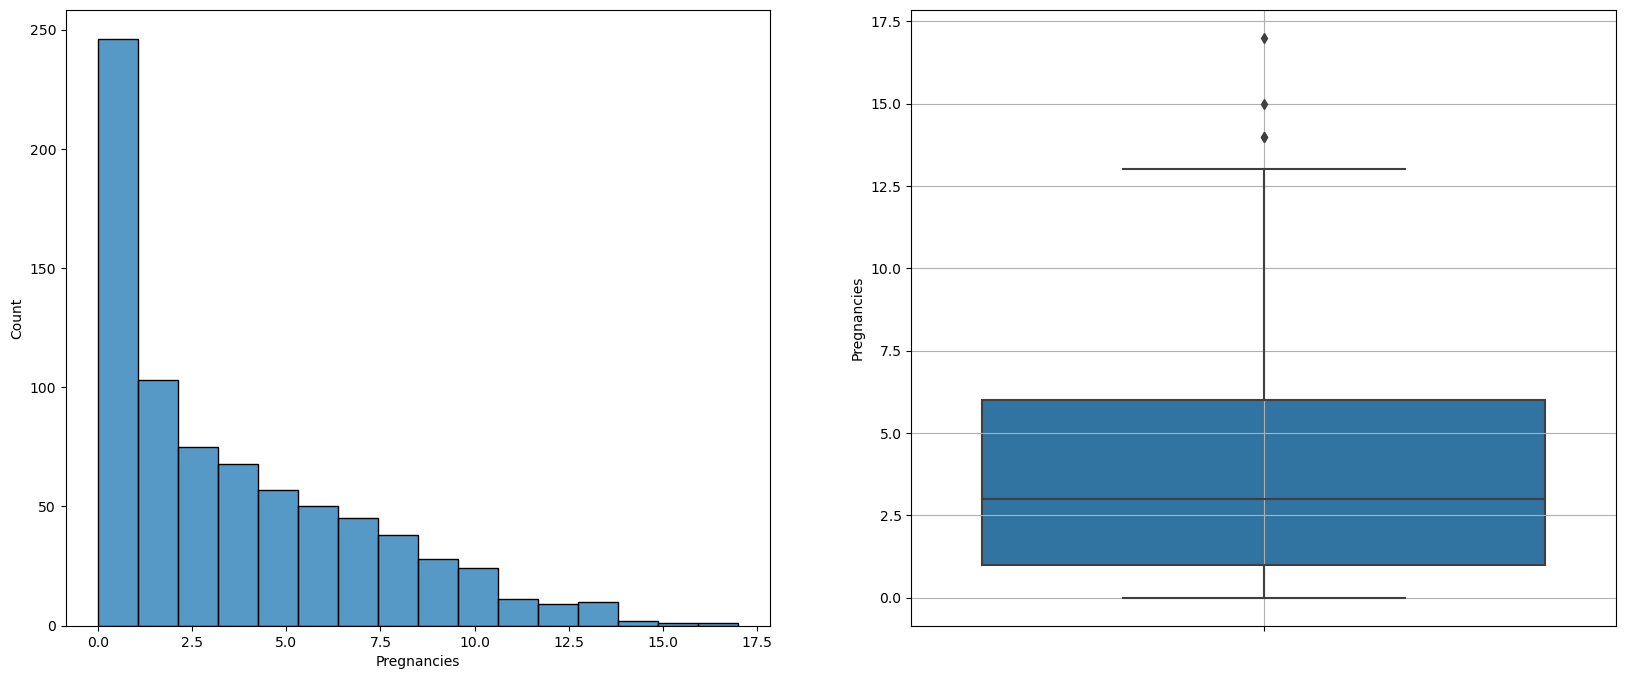

None


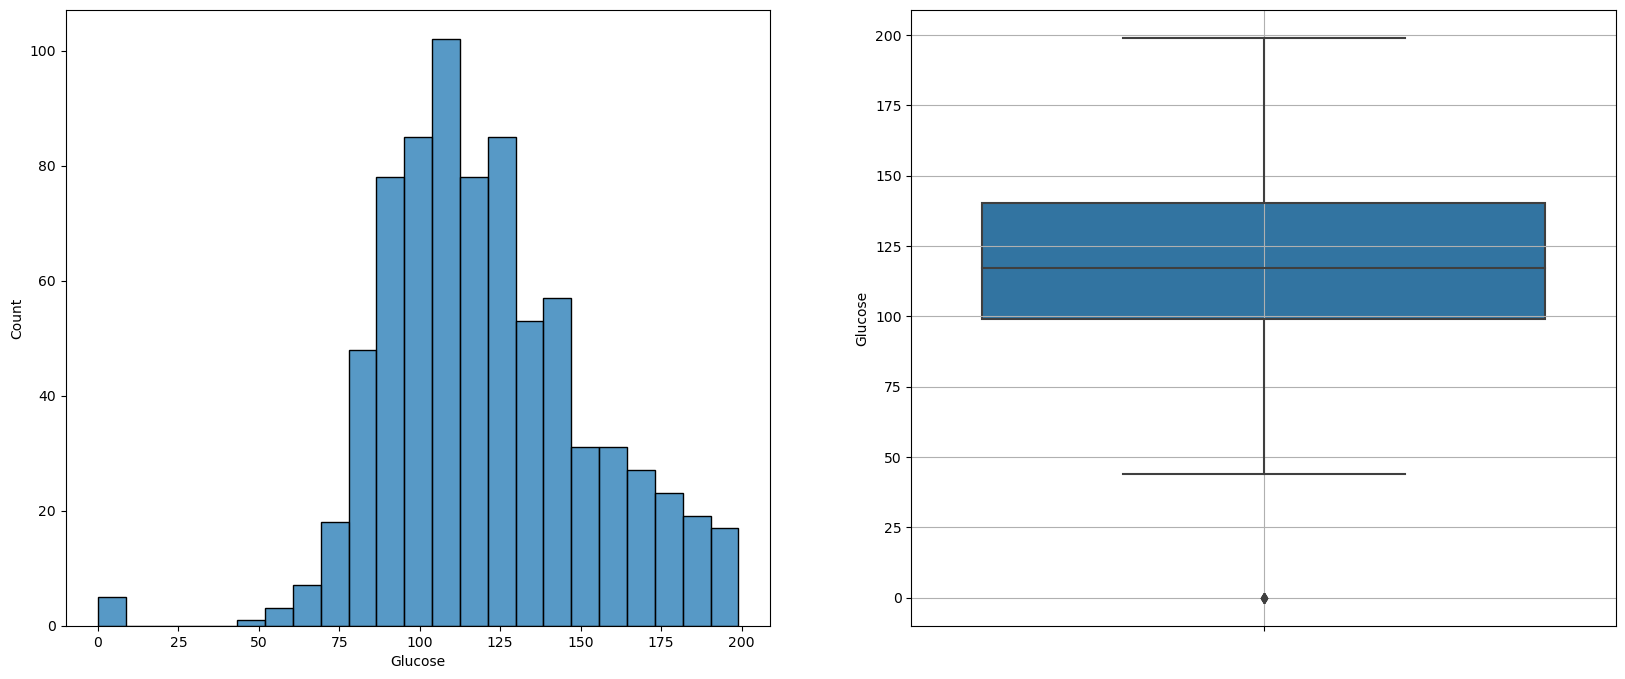

None


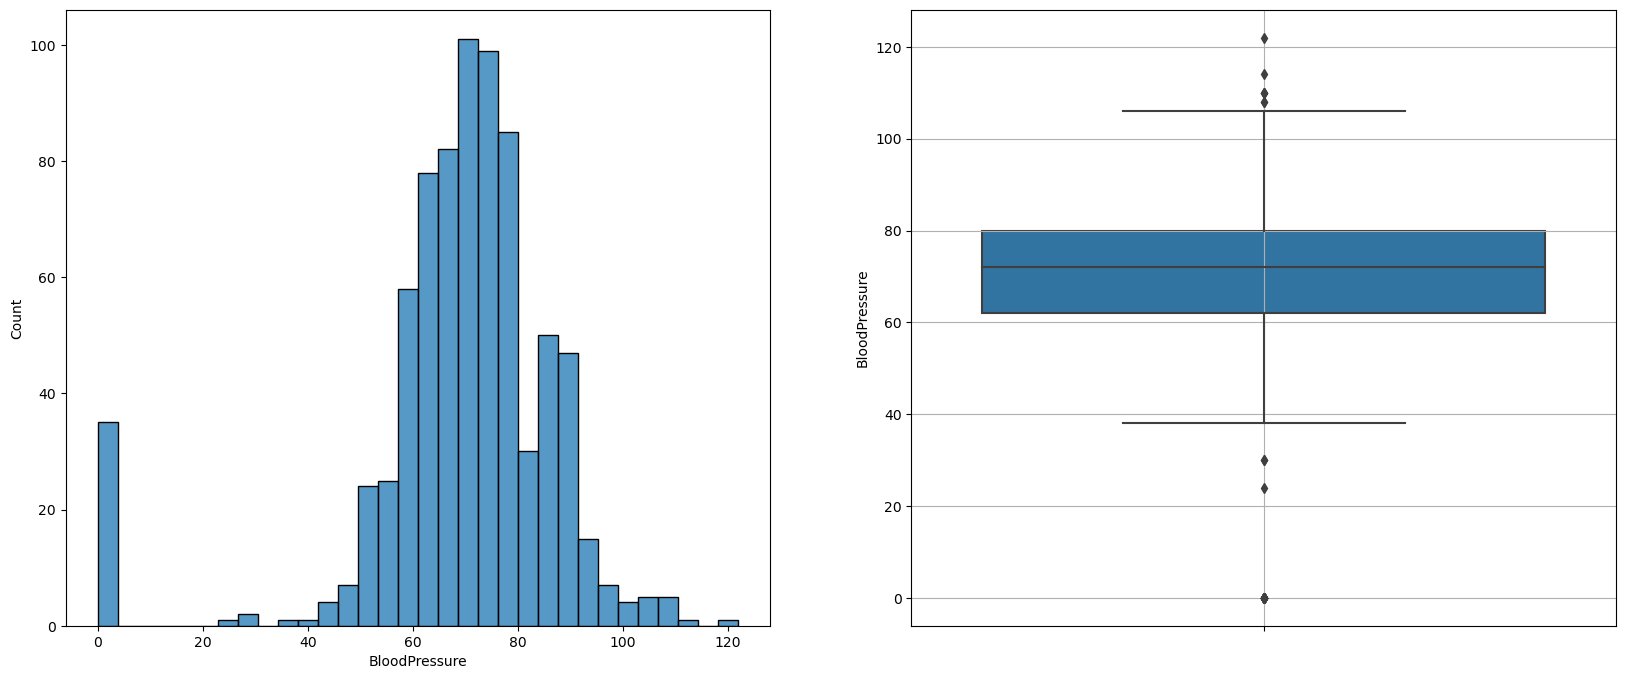

None


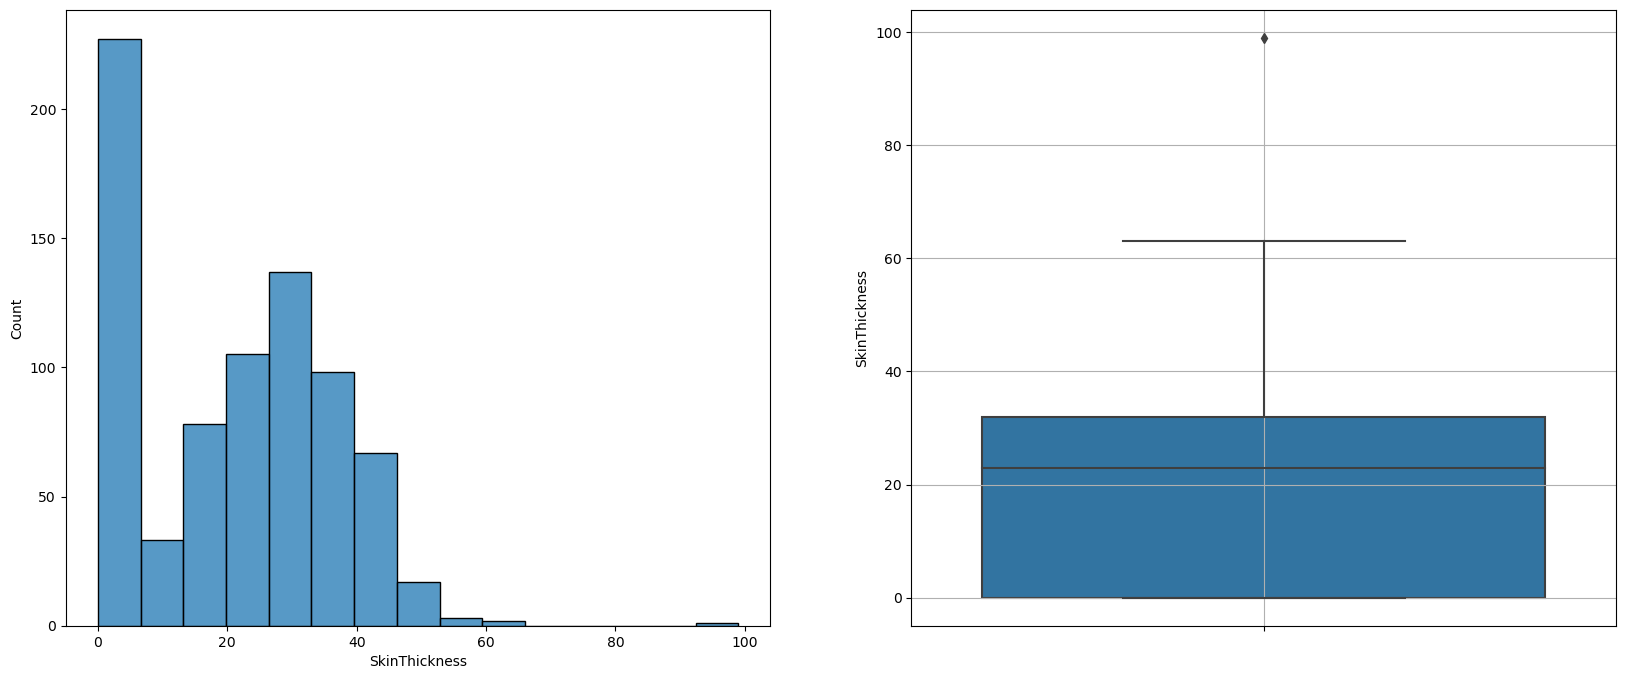

None


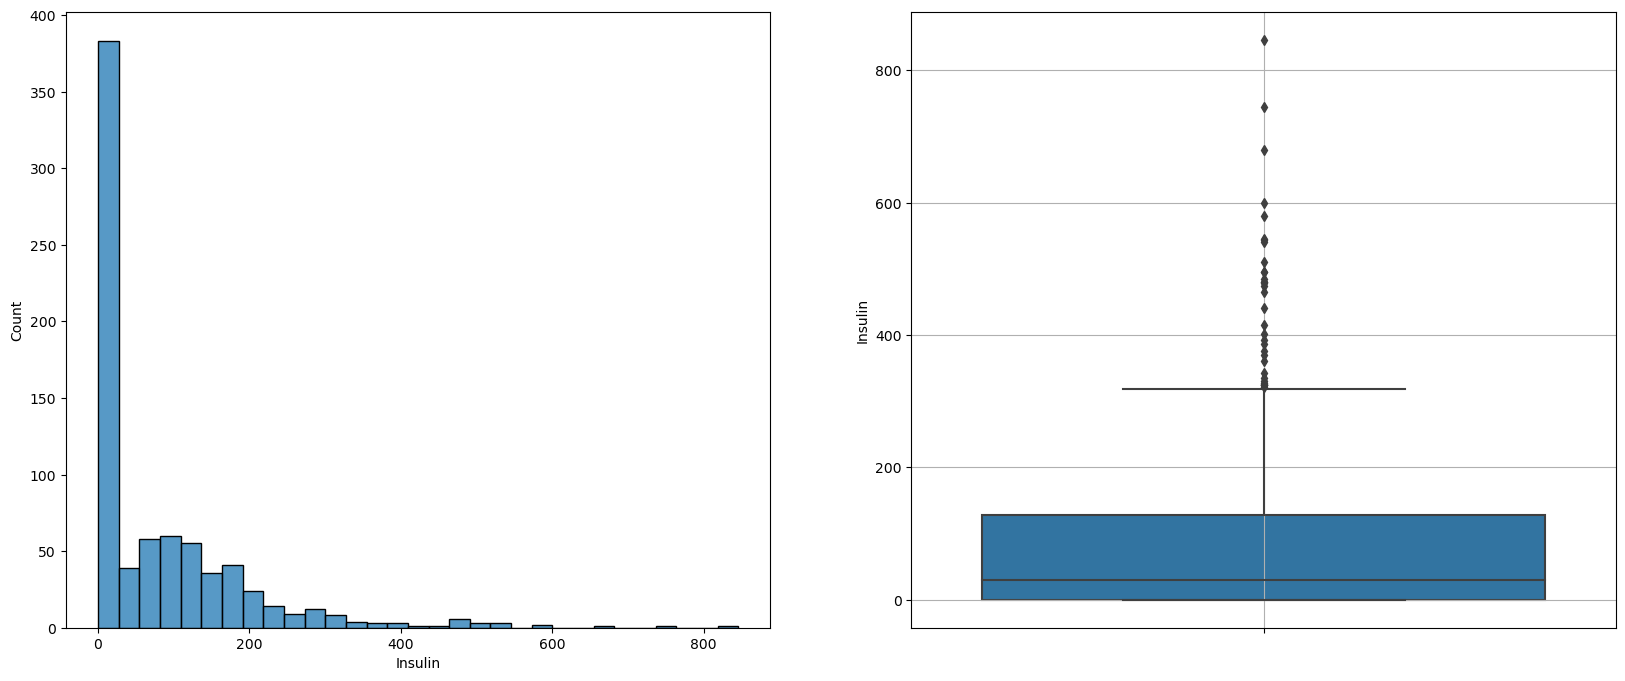

None


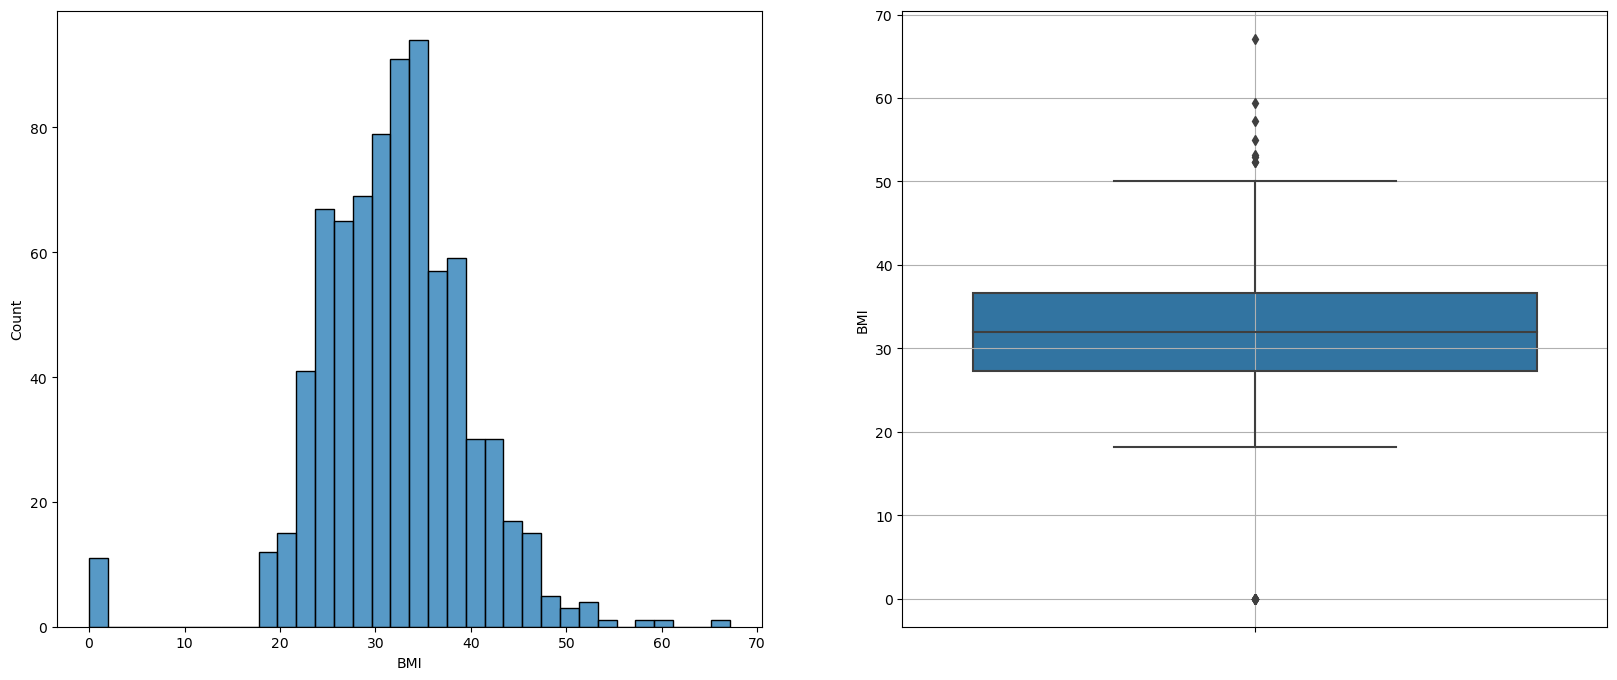

None


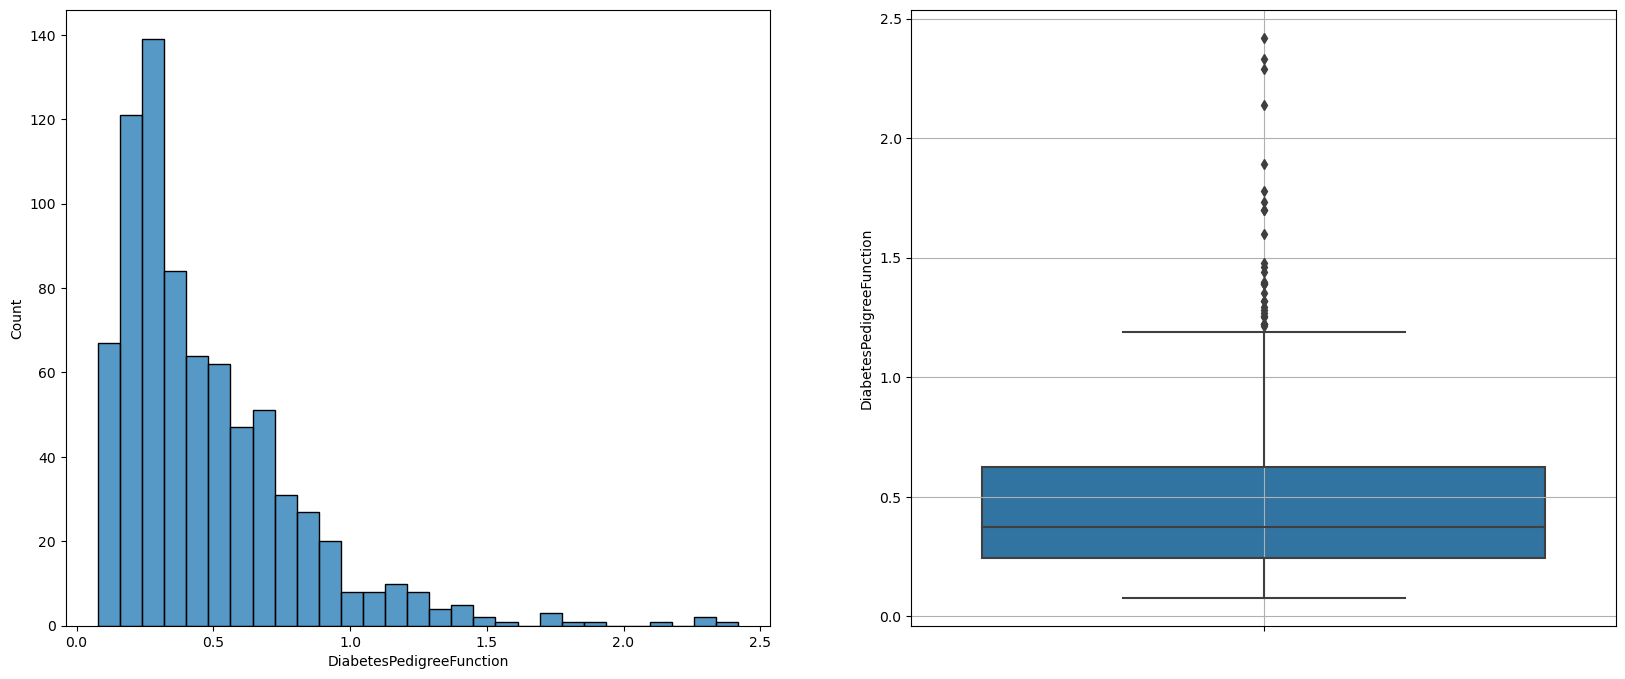

None


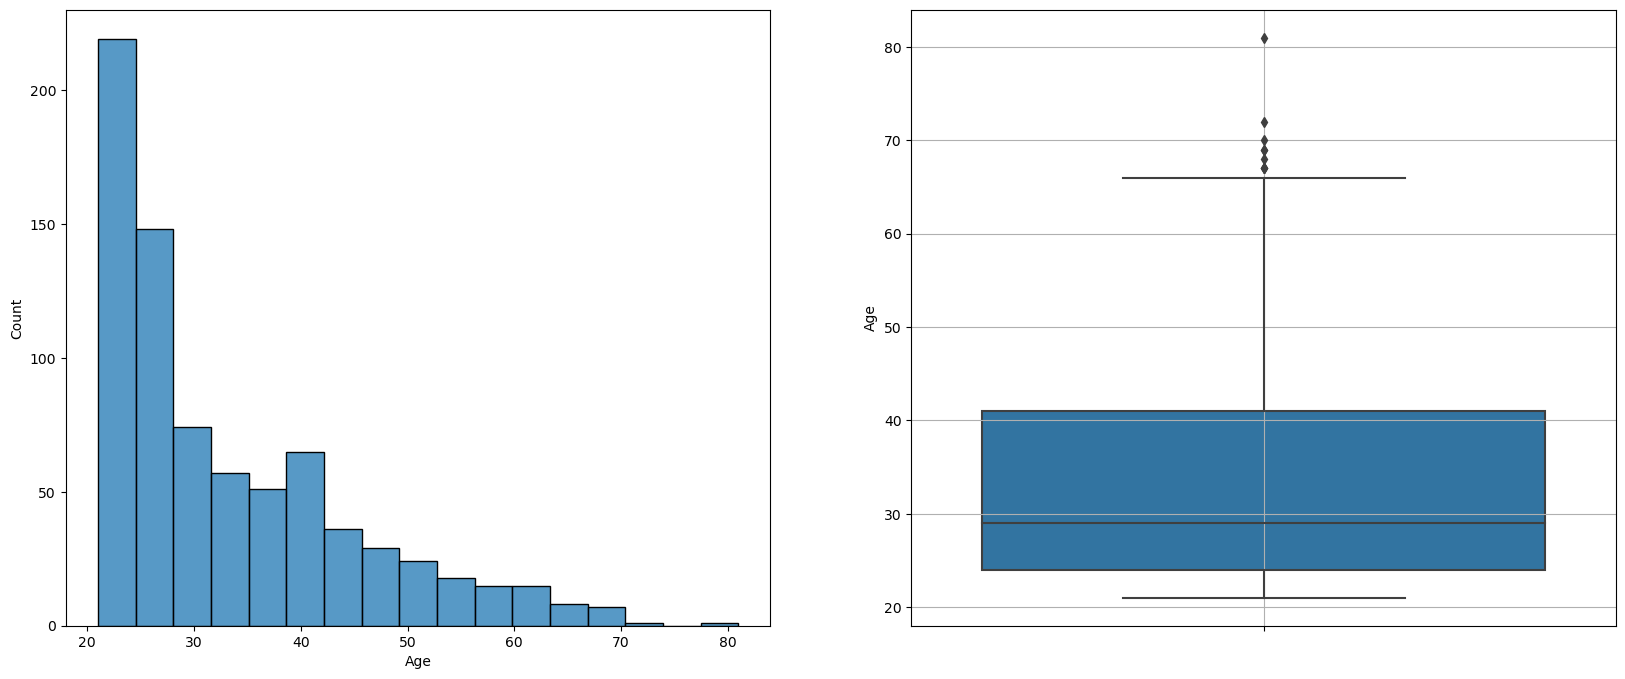

None


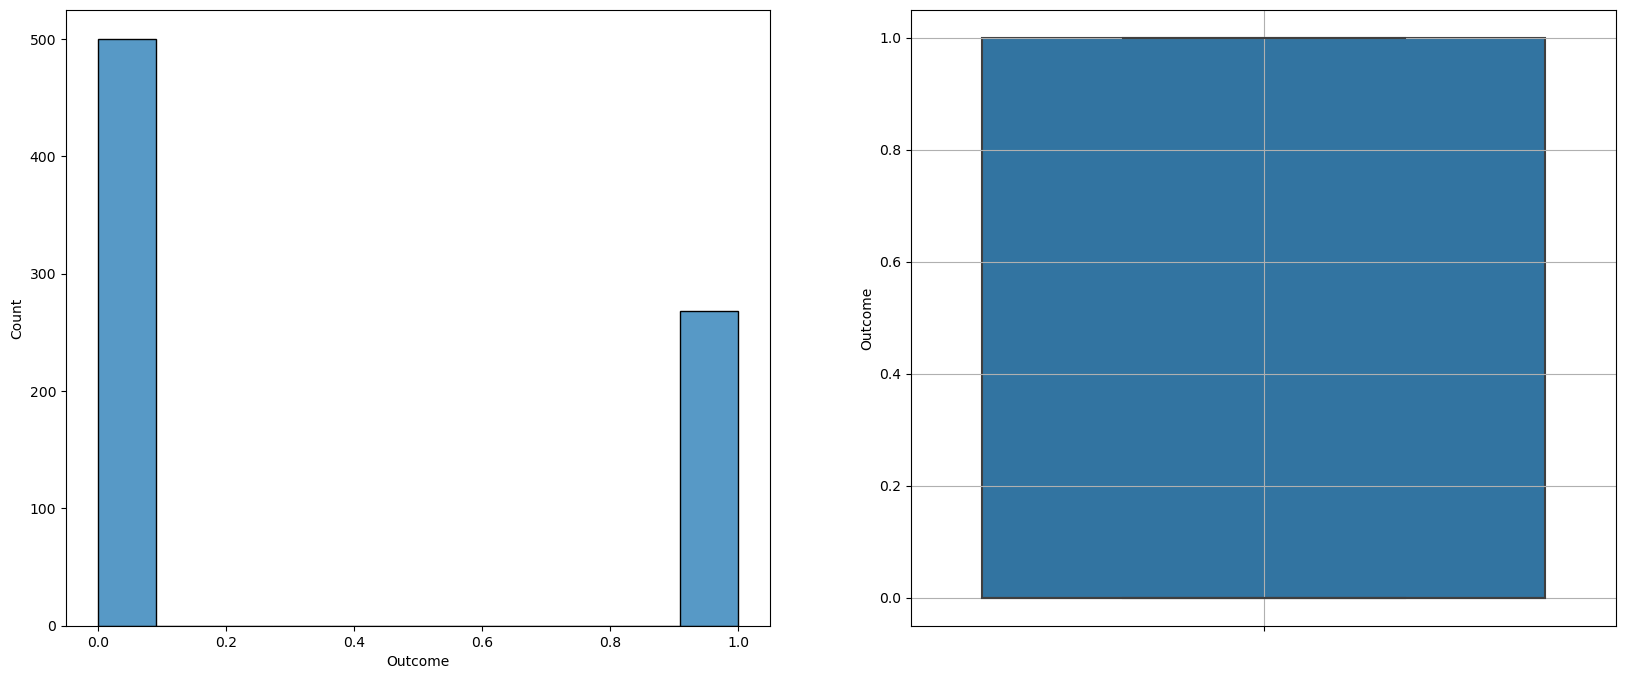

None


In [17]:
print("Exploratory Data Analysis Report: ")
univariate_data_analysis(data)

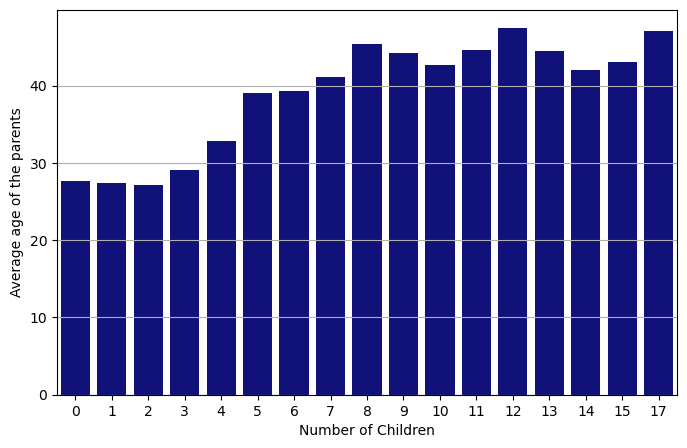

In [18]:
no_of_children = data.groupby(by=['Pregnancies'])['Age'].mean().index
average_ages = data.groupby(by=['Pregnancies'])['Age'].mean().values

plt.figure(figsize=[8,5])
plt.grid()
sns.barplot(x=no_of_children, y=average_ages, color='darkblue')
plt.xlabel("Number of Children")
plt.ylabel("Average age of the parents")
plt.show()

In [19]:
data.groupby(by=['Outcome'])['Pregnancies'].count()

Outcome
0    500
1    268
Name: Pregnancies, dtype: int64



*   0 - Non diabetic
*   1 - Diabetic

**Observation**

* There are total 500 childrens whose parents are been reported to be Non diabetic and there are 268 childrens whose parents are been reported to be Diabetic. 



In [20]:
Outcome_data = data["Outcome"].astype(object)
Pregnancies_data = data["Pregnancies"].astype(object)

In [21]:
data['Pregnancies_data'] = Pregnancies_data
data['Outcome_data'] = Outcome_data

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_data,Outcome_data
0,6,148,72,35,0,33.6,0.627,50,1,6,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,8,1
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1


In [23]:
data.groupby(by=['Pregnancies_data','Outcome_data'])['Pregnancies_data'].count()

Pregnancies_data  Outcome_data
0                 0                73
                  1                38
1                 0               106
                  1                29
2                 0                84
                  1                19
3                 0                48
                  1                27
4                 0                45
                  1                23
5                 0                36
                  1                21
6                 0                34
                  1                16
7                 0                20
                  1                25
8                 0                16
                  1                22
9                 0                10
                  1                18
10                0                14
                  1                10
11                0                 4
                  1                 7
12                0                 5
                  1

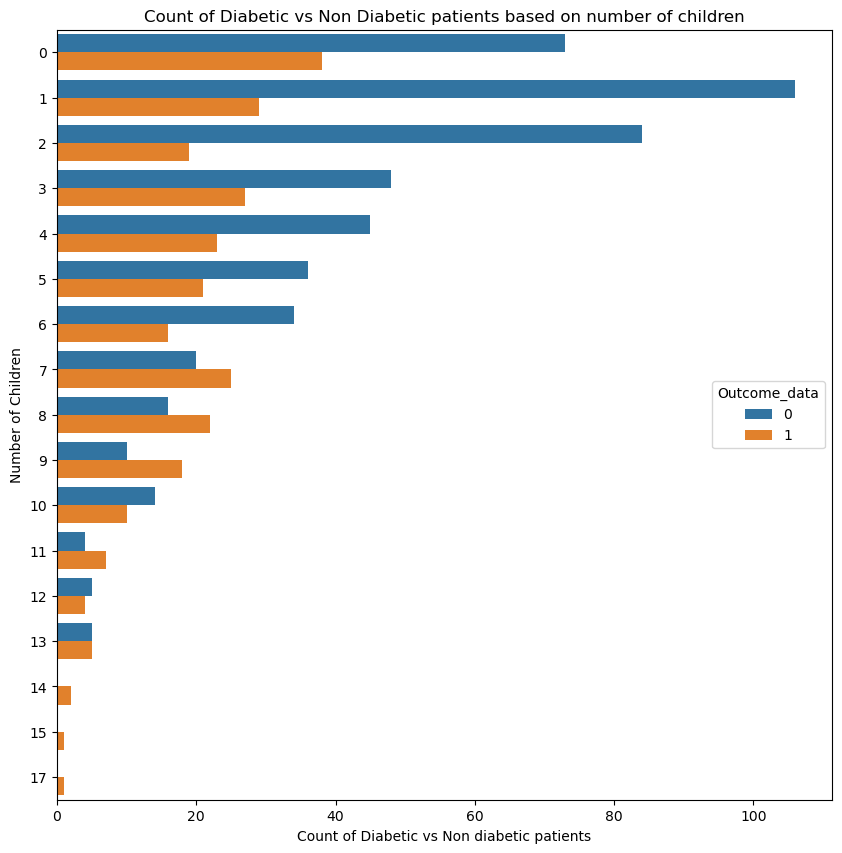

In [24]:
plt.figure(figsize=[10,10])
sns.countplot(y='Pregnancies_data', data=data, hue='Outcome_data')
plt.xlabel("Count of Diabetic vs Non diabetic patients")
plt.ylabel("Number of Children")
plt.title("Count of Diabetic vs Non Diabetic patients based on number of children")
plt.show()

In [25]:
data.groupby(by=['Pregnancies_data', 'Outcome_data'])['BMI'].median()

Pregnancies_data  Outcome_data
0                 0               32.40
                  1               37.00
1                 0               28.20
                  1               36.50
2                 0               29.70
                  1               32.90
3                 0               29.60
                  1               33.30
4                 0               31.30
                  1               32.30
5                 0               31.90
                  1               35.60
6                 0               29.90
                  1               30.85
7                 0               30.95
                  1               35.50
8                 0               29.90
                  1               32.80
9                 0               31.05
                  1               32.85
10                0               29.45
                  1               33.65
11                0               36.10
                  1               36.60
12       

<AxesSubplot:xlabel='BMI', ylabel='Count'>

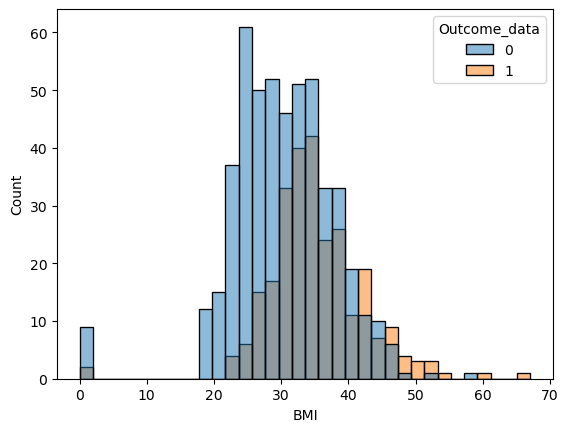

In [26]:
sns.histplot(x="BMI", data=data, hue='Outcome_data')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

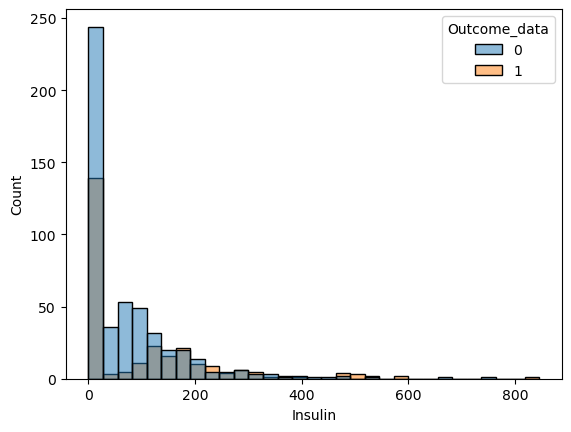

In [27]:
sns.histplot(x="Insulin", data=data, hue='Outcome_data')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

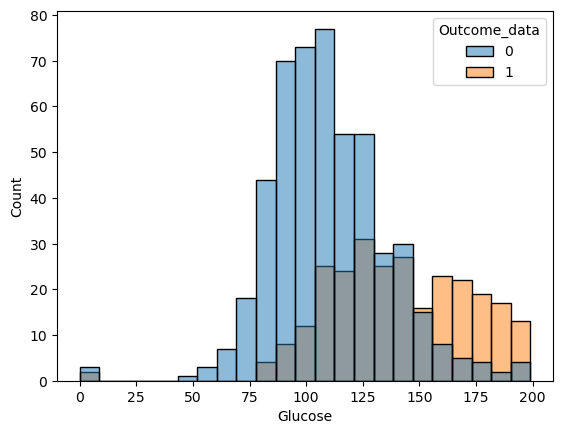

In [28]:
sns.histplot(x="Glucose", data=data, hue='Outcome_data')

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

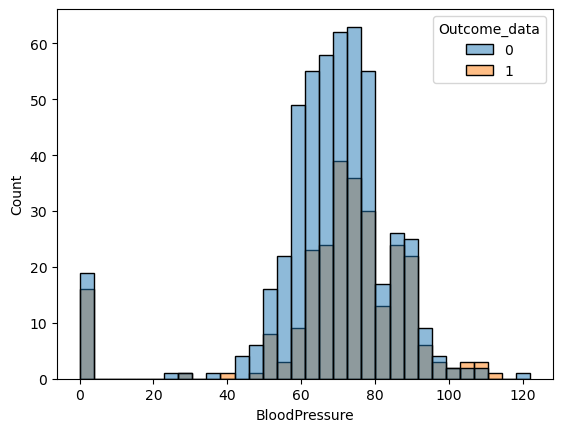

In [29]:
sns.histplot(x="BloodPressure", data=data, hue='Outcome_data')

In [30]:
data.drop(['Pregnancies_data','Outcome_data'], axis=1, inplace=True)

In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split
X = data.drop(['Outcome'],axis=1)
Y = data["Outcome"]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# **Model:- Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Training the model
log_reg.fit(X_train, Y_train)

c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
log_reg_test_pred = log_reg.predict(X_test)
log_reg_train_pred = log_reg.predict(X_train)

# **Model:- KNN model**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [37]:
knn_test_pred = knn.predict(X_test)
knn_train_pred = knn.predict(X_train)

c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [38]:
result_train_df = pd.DataFrame({"Actual_Data_train":Y_train,
                                "log_reg_train_pred":log_reg_train_pred,
                                "knn_train_pred":knn_train_pred})

In [39]:
result_train_df

,Actual_Data_train,log_reg_train_pred,knn_train_pred
41,0,1,0
74,0,0,0
508,0,0,0
331,0,0,0
654,0,0,0
...,...,...,...
152,1,1,1
248,0,0,0
325,0,0,1
182,0,0,0


In [40]:
result_test_df = pd.DataFrame({"Actual_Data_test":Y_test,
                                "log_reg_test_pred":log_reg_test_pred,
                                "knn_test_pred":knn_test_pred})

In [41]:
result_test_df

,Actual_Data_test,log_reg_test_pred,knn_test_pred
7,0,1,1
639,0,0,0
449,0,0,0
459,0,1,0
374,0,0,1
...,...,...,...
631,0,0,0
282,0,0,0
444,1,0,0
581,0,0,0


# **Accuracy Scores**

In [42]:
from sklearn.metrics import accuracy_score

### **Logistic Regression**

In [43]:
print("The accuracy score for logistic regression model in train is :", accuracy_score(result_train_df["Actual_Data_train"],result_train_df["log_reg_train_pred"])*100)

The accuracy score for logistic regression model in train is : 75.86805555555556


In [44]:
print("The accuracy score for logistic regression model in test is :", accuracy_score(result_test_df["Actual_Data_test"],result_test_df["log_reg_test_pred"])*100)

The accuracy score for logistic regression model in test is : 81.77083333333334


### **KNN model**

In [45]:
print("The accuracy score for KNN model in train is :", accuracy_score(result_train_df["Actual_Data_train"],result_train_df["knn_train_pred"])*100)

The accuracy score for KNN model in train is : 80.03472222222221


In [46]:
print("The accuracy score for KNN model in test is :", accuracy_score(result_test_df["Actual_Data_test"],result_test_df["knn_test_pred"])*100)

The accuracy score for KNN model in test is : 72.91666666666666


#### **Classification Report & Confusion Matrix**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

#### Logistic Regression Model

In [48]:
print("The Classification report of Logistic Regression model in train is:\n",
      classification_report(result_train_df["Actual_Data_train"],result_train_df["log_reg_train_pred"]))

The Classification report of Logistic Regression model in train is:
               precision    recall  f1-score   support

           0       0.79      0.87      0.82       377
           1       0.69      0.55      0.61       199

    accuracy                           0.76       576
   macro avg       0.74      0.71      0.72       576
weighted avg       0.75      0.76      0.75       576



In [49]:
print("The Classification report of Logistic Regression model in test is:\n",
      classification_report(result_test_df["Actual_Data_test"],result_test_df["log_reg_test_pred"]))

The Classification report of Logistic Regression model in test is:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       123
           1       0.81      0.64      0.72        69

    accuracy                           0.82       192
   macro avg       0.82      0.78      0.79       192
weighted avg       0.82      0.82      0.81       192



<AxesSubplot:>

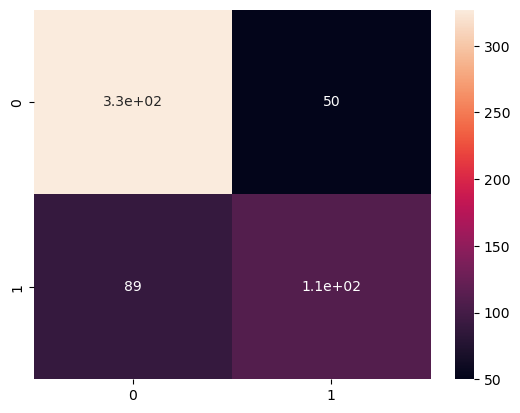

In [50]:
# Confusion Matrix for Logistic Regression Model in train data
sns.heatmap(confusion_matrix(result_train_df["Actual_Data_train"],result_train_df["log_reg_train_pred"]), annot=True)

<AxesSubplot:>

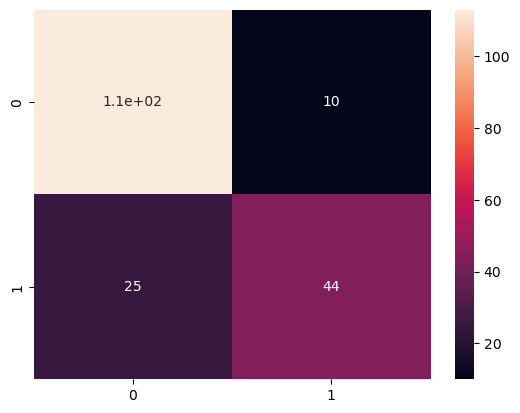

In [51]:
# Confusion Matrix for Logistic Regression Model in test data
sns.heatmap(confusion_matrix(result_test_df["Actual_Data_test"],result_test_df["log_reg_test_pred"]), annot=True)

#### **KNN Model**

In [52]:
print("The Classification report of KNN model in train is:\n",
      classification_report(result_train_df["Actual_Data_train"],result_train_df["knn_train_pred"]))

The Classification report of KNN model in train is:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       377
           1       0.73      0.66      0.70       199

    accuracy                           0.80       576
   macro avg       0.78      0.77      0.77       576
weighted avg       0.80      0.80      0.80       576



In [53]:
print("The Classification report of KNN model in test is:\n",
      classification_report(result_test_df["Actual_Data_test"],result_test_df["knn_test_pred"]))

The Classification report of KNN model in test is:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       123
           1       0.64      0.57      0.60        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.73       192



<AxesSubplot:>

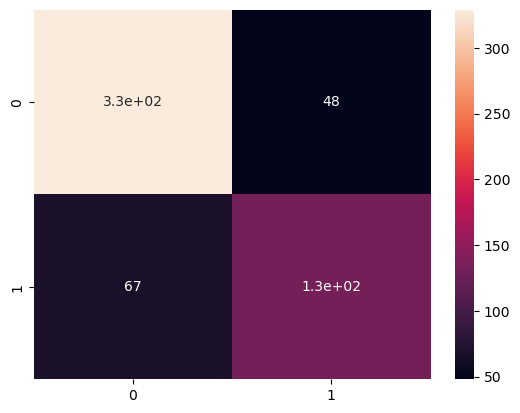

In [54]:
# Confusion Matrix for KNN Model in test data
sns.heatmap(confusion_matrix(result_train_df["Actual_Data_train"],result_train_df["knn_train_pred"]), annot=True)

<AxesSubplot:>

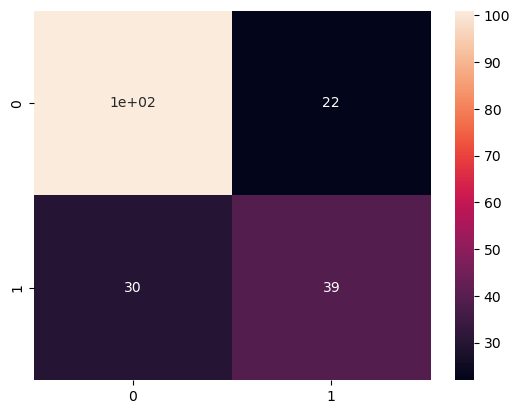

In [55]:
# Confusion Matrix for KNN Model in test data
sns.heatmap(confusion_matrix(result_test_df["Actual_Data_test"],result_test_df["knn_test_pred"]), annot=True)

In [56]:
log_reg_train = accuracy_score(result_train_df["Actual_Data_train"],result_train_df["log_reg_train_pred"])*100
log_reg_test = accuracy_score(result_test_df["Actual_Data_test"],result_test_df["log_reg_test_pred"])*100
KNN_train = accuracy_score(result_train_df["Actual_Data_train"],result_train_df["knn_train_pred"])*100
KNN_test = accuracy_score(result_test_df["Actual_Data_test"],result_test_df["knn_test_pred"])*100

In [57]:
pd.DataFrame({"model":["log_reg_train","log_reg_test","KNN_train", "KNN_test"],
               "Accuracy Scores" :[log_reg_train,log_reg_test,KNN_train,KNN_test]})

,model,Accuracy Scores
0,log_reg_train,75.868056
1,log_reg_test,81.770833
2,KNN_train,80.034722
3,KNN_test,72.916667


### **Hyperparameter Tuning for KNN model**

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [62]:
param_grid = {'n_neighbors': [3,4,5,6,7], "algorithm": ['auto', 'kd_tree'], 'n_jobs': [-1]}

grid_search = GridSearchCV(knn, param_grid)
random_search = RandomizedSearchCV(knn, param_grid)

In [64]:
# Begin hyperparameter tunning with grid search cv
grid_search.fit(X_train, Y_train)

c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'], 'n_jobs': [-1],
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [63]:
# Begin hyperparameter tunning with random search cv
random_search.fit(X_train, Y_train)

c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'n_jobs': [-1],
                                        'n_neighbors': [3, 4, 5, 6, 7]})

In [65]:
best_params_grid_search = grid_search.best_params_
best_params_random_search = random_search.best_params_

In [66]:
best_params_grid_search

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 6}

In [67]:
best_params_random_search

{'n_neighbors': 6, 'n_jobs': -1, 'algorithm': 'auto'}

In [69]:
best_model_grid_search = KNeighborsClassifier(n_neighbors=6, n_jobs=-1, algorithm='auto')
best_model_random_search = KNeighborsClassifier(n_neighbors=6, n_jobs=-1, algorithm='auto')

In [70]:
best_model_grid_search.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [71]:
best_model_random_search.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [72]:
best_predictions_grid_search = best_model_grid_search.predict(X_test)

c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
best_predictions_random_search = best_model_random_search.predict(X_test)

c:\Users\Piyush S More\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score for KNN model after hyperparameter tuning

In [74]:
from sklearn.metrics import accuracy_score

# For grid search cv
print("The accuracy score for KNN model before tuning in test is :", accuracy_score(result_test_df["Actual_Data_test"],result_test_df["knn_test_pred"])*100)
print("The accuracy score for KNN model after tuning in test is :", accuracy_score(result_test_df["Actual_Data_test"],best_predictions_grid_search)*100)

The accuracy score for KNN model before tuning in test is : 72.91666666666666
The accuracy score for KNN model after tuning in test is : 73.4375


In [77]:
# For random search cv
print("The accuracy score for KNN model before tuning in test is :", accuracy_score(result_test_df["Actual_Data_test"],result_test_df["knn_test_pred"])*100)
print("The accuracy score for KNN model after tuning in test is :", accuracy_score(result_test_df["Actual_Data_test"],best_predictions_random_search)*100)

The accuracy score for KNN model before tuning in test is : 72.91666666666666
The accuracy score for KNN model after tuning in test is : 73.4375


As we can see that in both random search and grid search the parameters were same so the accuracy scores of both the models are same that are about 73.4%.